In [ ]:
#!pip install torchsummary
#!pip install tensorflow
#!pip install keras
#!pip install numpy
#!pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Model
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from keras.layers import Conv2D, MaxPool2D , MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = "/content/drive/MyDrive/pneumonia/"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/test"
diseases =os.listdir(train_dir)
imgSize = 220
RGBClasses = 3

trainingDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
train_generator = trainingDataGenerator.flow_from_directory(
        "/content/drive/MyDrive/pneumonia/train",
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 1585 images belonging to 5 classes.


In [4]:
train_generator.class_indices
classNames = list(train_generator.class_indices.keys())
classNames

['NORMAL', 'type1', 'type2', 'type3', 'type4']

In [5]:
for images,labels in train_generator:
    print(images.shape)
    break

(32, 220, 220, 3)


In [6]:
validationDataGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
validation_generator = validationDataGenerator.flow_from_directory(
        '/content/drive/MyDrive/pneumonia/test',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 629 images belonging to 5 classes.


In [8]:
testingDattaGenerator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True
)
test_generator = validationDataGenerator.flow_from_directory(
        '/content/drive/MyDrive/pneumonia/test',
        target_size=(imgSize,imgSize),
        batch_size=32,
        class_mode="sparse",
)

Found 629 images belonging to 5 classes.


In [9]:
inputShape = (imgSize, imgSize, RGBClasses)
n_classes = 5
#test

In [12]:
#from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf


In [14]:
model = Sequential()

model.add(SeparableConv2D(32,3,
                          activation="relu",
                 input_shape=(220,220,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2)))

#
model.add(SeparableConv2D(64,3,
                 activation="relu"))
model.add(SeparableConv2D(128,(3,3),
                 activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2)))

#
model.add(SeparableConv2D(128,3,
                 activation="relu"))
model.add(SeparableConv2D(256,3,
                 activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2)))
#
model.add(SeparableConv2D(256,3,
                 activation="relu"))
model.add(SeparableConv2D(512,3,
                 activation="relu"))
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())

#
model.add(Flatten())
model.add(Dense(1024,
                activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10,
                activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_7 (Separab  (None, 218, 218, 32)     155       
 leConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 218, 218, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 109, 109, 32)     0         
 2D)                                                             
                                                                 
 separable_conv2d_8 (Separab  (None, 107, 107, 64)     2400      
 leConv2D)                                                       
                                                                 
 separable_conv2d_9 (Separab  (None, 105, 105, 128)   

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
        validation_data=validation_generator,
        epochs=7, verbose=1
) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


50/50 [==============================] - 515s 10s/step - loss: 1.2306 - accuracy: 0.7836 - val_loss: 2.1232 - val_accuracy: 0.3402


In [ ]:
evaluation = model.evaluate(test_generator)

20/20 [==============================] - 25s 1s/step - loss: 2.1232 - accuracy: 0.3402


Text(0.5, 0, 'epoch')

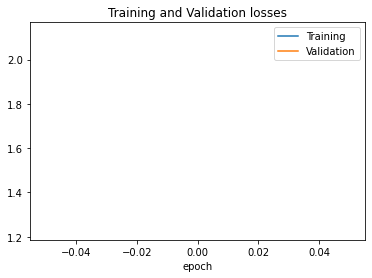

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

first image to predict
predicted label: NORMAL


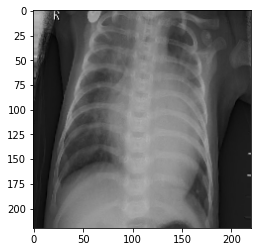

In [ ]:
for images, labels in test_generator:
    
    first_image = images[0]
    
    first_label = int(labels[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    
    
    batch_prediction = model.predict(images)
    print("predicted label:",classNames[np.argmax(batch_prediction[0])])
    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classNames[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

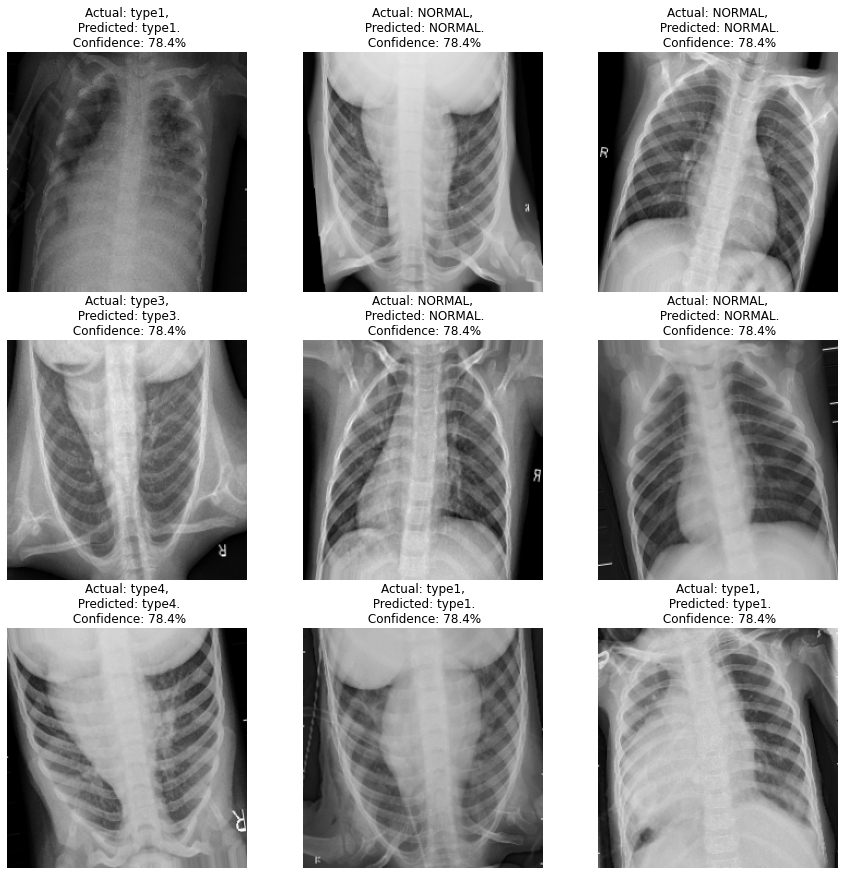

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        classe = classNames[int(labels[i])] 
        
        plt.title(f"Actual: {classe},\n Predicted: {classe}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break